Project abstract: "The weather and shock station collects data on temperature and humidity every two minutes and detects strong earthquakes - those that last longer than 3x0.25 seconds. If such a shock occurs, its duration is measured, as well as the temperature and humidity at that time. Then a graph of all the collected data is created, the interpretation of which allows us to determine whether there is a relationship between earthquakes and the values ​​of air temperature and humidity."

Data collected during the station's operation time (e.g., a pre-defined half hour) is saved to the SD card so that it can be accessed at any time, and is also displayed in the Arduino serial monitor so that it can be copied manually if there are problems downloading it from the SD card.

Below is an example command for downloading data saved to the SD card:

In [ ]:
with open('E:/dane01.txt', 'r') as file:
    data = file.read()
    print(data)

Analysis of recorded data - detection of shock, how long it lasted, what was the temperature and humidity at that time:
* 1️⃣ Counting shocks: The program counts the number of shocks that occur within one minute.
* 2️⃣ Measuring the duration of the shock: The duration of the shock will be measured using the shockDuration variable.
* 3️⃣ Checking the number of shocks within a minute: After each shock, it is counted, the counter is reset after a minute.
-> if there are more than three shocks in a minute, then it is defined as a full shock - danger + DURATION GIVEN AND WHAT THE TEMPERATURE AND HUMIDITY WERE THEN
* 4️⃣ Data is saved to the SD card to a file (sample name - data01.txt) (if necessary, additional, empty files are also created with each initialization)
* 5️⃣ The station works for 30 minutes from the moment of switching on. During this time, data is recorded and saved to the SD card (humidity and temperature, and the time of the shock and the temperature and humidity prevailing during it)

The program also creates a data graph - including the moments when large tremors occur and their duration (milliseconds/seconds) + lines representing temperature and humidity - thanks to this graph you will be able to see if they changed during dangerous quakes.

Example graph for a manually entered data package (for the sake of readability of the graph, time values ​​are given in original milliseconds):

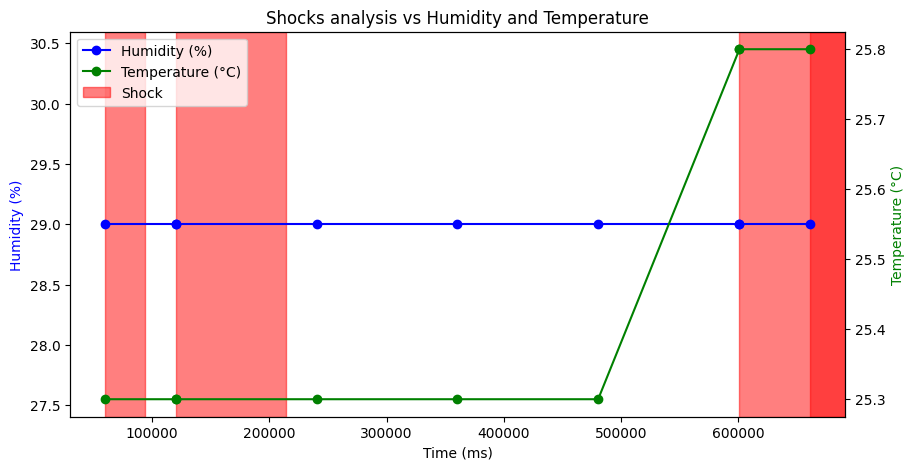

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Test data
sample_data = [
    (60161, 29.00, 25.30, 33725),
    (120373, 29.00, 25.30, 93937),
    (120419, 29.00, 25.30, 0),
    (240403, 29.00, 25.30, 0),
    (360402, 29.00, 25.30, 0),
    (480403, 29.00, 25.30, 0),
    (600863, 29.00, 25.80, 574427),
    (600910, 29.00, 25.80, 0),
    (660864, 29.00, 25.80, 634427)
]

# Data processing
czas = [d[0] for d in sample_data]
wilgotnosc = [d[1] for d in sample_data]
temperatura = [d[2] for d in sample_data]
wstrzasy = [(d[0], d[3]) for d in sample_data if d[3] > 0]

# Plot making
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Temperature and humidity plot
line1, = ax1.plot(czas, wilgotnosc, 'bo-', label='Humidity (%)')
line2, = ax2.plot(czas, temperatura, 'go-', label='Temperature (°C)')

# Shock marking
for start, duration in wstrzasy:
    ax1.axvspan(start, start + duration, color='red', alpha=0.5)

# Making a legend for shocks
wstrzas_patch = mpatches.Patch(color='red', alpha=0.5, label='Shock')

# Axis description and legend
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Humidity (%)', color='blue')
ax2.set_ylabel('Temperature (°C)', color='green')

# Connecting points
lines = [line1, line2, wstrzas_patch]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Shocks analysis vs Humidity and Temperature')
plt.show()


However, in general, for larger data sets (e.g. half an hour of station operation), the X-axis of the graph is scaled in seconds.

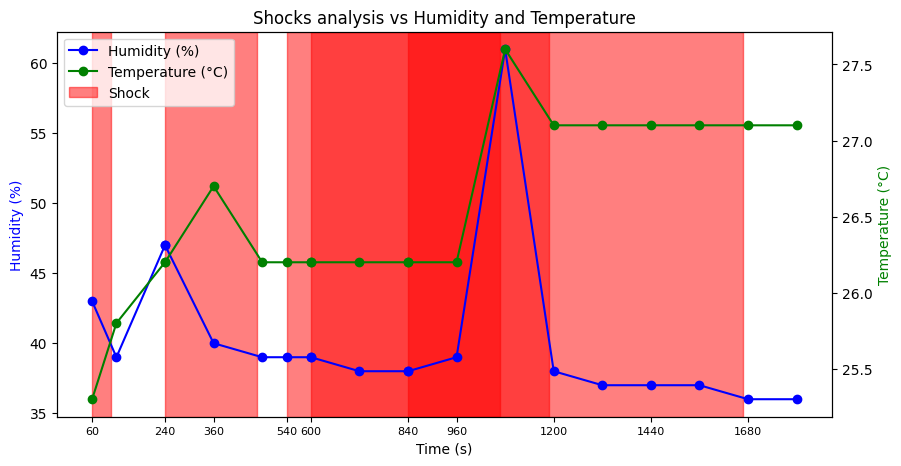

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Test data
sample_data = [
    (60054, 43.00, 25.30, 47013),
    (120023, 39.00, 25.80, 0),
    (240055, 47.00, 26.20, 227013),
    (240102, 47.00, 26.20, 0),
    (360085, 40.00, 26.70, 0),
    (480084, 39.00, 26.20, 0),
    (540401, 39.00, 26.20, 527359),
    (600085, 39.00, 26.20, 0),
    (600402, 39.00, 26.20, 587338),
    (720084, 38.00, 26.20, 0),
    (840085, 38.00, 26.20, 0),
    (840402, 38.00, 26.20, 827338),
    (960084, 39.00, 26.20, 0),
    (1080086, 61.00, 27.60, 0),
    (1200084, 38.00, 27.10, 0),
    (1320085, 37.00, 27.10, 0),
    (1440084, 37.00, 27.10, 0),
    (1560085, 37.00, 27.10, 0),
    (1680084, 36.00, 27.10, 0),
    (1800085, 36.00, 27.10, 0)
]

# Data processing
czas = [d[0] for d in sample_data]
wilgotnosc = [d[1] for d in sample_data]
temperatura = [d[2] for d in sample_data]
wstrzasy = [(d[0], d[3]) for d in sample_data if d[3] > 0]

# Converting time to sec
czas = [t / 1000 for t in czas]
wstrzasy = [(t / 1000, d / 1000) for t, d in wstrzasy]

# Making plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Humidity and temperature plot
line1, = ax1.plot(czas, wilgotnosc, 'bo-', label='Humidity (%)')
line2, = ax2.plot(czas, temperatura, 'go-', label='Temperature (°C)')

# Shocks marking
for start, duration in wstrzasy:
    ax1.axvspan(start, start + duration, color='red', alpha=0.5)

# Making a legend for shocks
wstrzas_patch = mpatches.Patch(color='red', alpha=0.5, label='Shock')

# Axis description and legend
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Humidity (%)', color='blue')
ax2.set_ylabel('Temperature (°C)', color='green')

# Set every second value on the X axis and reduce the font size
ax1.set_xticks(czas[::2])
ax1.set_xticklabels([str(int(t)) for t in czas[::2]], fontsize=8)

# Connecting points
lines = [line1, line2, wstrzas_patch]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Shocks analysis vs Humidity and Temperature')
plt.show()


Thanks to the collected data, it will be possible to analyze the possible impact of humidity and temperature on each other and the occurrence of earthquakes. In the next stages, thanks to machine learning and training based on the collected data, it will be possible to predict changes in temperature and humidity or the occurrence of earthquakes.